In [68]:
import numpy as np
import pandas as pd
from scipy.signal import butter,lfilter,filtfilt
import matplotlib.pyplot as plt
import math

In [69]:
# called data analysis
df = pd.read_csv('C:/Users/ASUS/OneDrive/Desktop/Documents/Kuliah/SEMESTER_5/IOT kemampuan cerdas/Tugas_IOT/Activity Recognition from Single Chest-Mounted Accelerometer/2.csv', \
    names=['index','X','Y','Z','L'])
df


,index,X,Y,Z,L
0,0.0,1984,1998,1645,1
1,1.0,1984,2003,1653,1
2,2.0,1987,2002,1648,1
3,3.0,1990,2001,1650,1
4,4.0,1992,2000,1657,1
...,...,...,...,...,...
137996,138000.0,2142,2314,1985,7
137997,138000.0,2139,2301,1992,7
137998,138000.0,2136,2315,1990,7
137999,138000.0,2134,2320,1982,7


In [70]:
df.drop(['L'],axis=1)
df = df.drop([0])

In [71]:
df

,index,X,Y,Z,L
1,1.0,1984,2003,1653,1
2,2.0,1987,2002,1648,1
3,3.0,1990,2001,1650,1
4,4.0,1992,2000,1657,1
5,5.0,1987,2003,1652,1
...,...,...,...,...,...
137996,138000.0,2142,2314,1985,7
137997,138000.0,2139,2301,1992,7
137998,138000.0,2136,2315,1990,7
137999,138000.0,2134,2320,1982,7


In [72]:
def butter_lowpass_filter(data,cutoff,fs, order):
    nyq = 0.5 * fs 
    normal_cutoff = cutoff/nyq
    b,a = butter(order, normal_cutoff, btype = "low", analog=False)
    y = filtfilt(b,a,data)
    return y

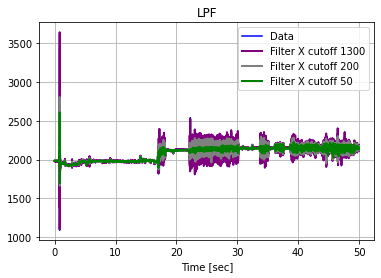

In [73]:
#filter requirement 
T= 50#pengambilan data dalam detik
order = 5 # sin wave can be approx represented as quadraticn
fs = 2760 # sample rate, Hz
cutoff = [50,200,1300]# desired cutoff frequency of the filter
n = T*fs #menunjukan total sample
t = np.linspace(0, T, n, endpoint=False)
x1 = butter_lowpass_filter(df['X'], cutoff[0], fs, order)
x2 = butter_lowpass_filter(df['X'], cutoff[1], fs, order)
x3= butter_lowpass_filter(df['X'], cutoff[2], fs, order)
plt.title('LPF')
plt.plot(t, df['X'], 'b-', label='Data',)
plt.plot(t, x3, 'purple', linewidth=2, label=f'Filter X cutoff {cutoff[2]}')
plt.plot(t, x2, 'grey', linewidth=2, label=f'Filter X cutoff {cutoff[1]}')
plt.plot(t, x1, 'green', linewidth=2, label=f'Filter X cutoff {cutoff[0]}')

plt.xlabel('Time [sec]')
plt.grid()
plt.legend()
# df
plt.show()

MVA

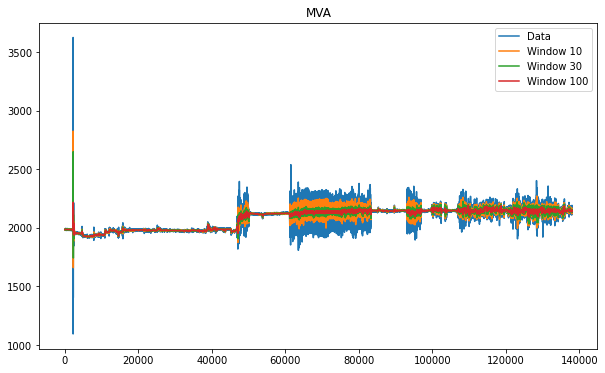

In [74]:

plt.title('MVA')
df['X'].plot(figsize=(10,6), label='Data')
for i in [10,30,100]:
    df['X'].rolling(window =i).mean().plot(label=f'Window {i}')
plt.legend()
plt.show()